In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
# read CSV file, parse 'date' column into DateTime, set 'date' as the df index
#df = pd.read_csv("https://covid.ourworldindata.org/data/who/full_data.csv", parse_dates=['date'], index_col="date")
df = pd.read_csv("data/coronavirus/full_data_2020-03-24.csv", parse_dates=['date'], index_col="date")
#note that the date column label is listed lower than the other column labels, indicating it is the index value
df.head(5)

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0


In [73]:
#df.columns
df100 = df.reset_index()
df100.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [51]:
#Days since 100th case
locations = df100.location.unique()
for locs in locations:
    #loop through each row in df
    marker = 0
    for index, row in df100.iterrows():
        if row['location'] == locs:
            if row['total_cases'] < 100:
                print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']))
                df100.loc[index,'d100th_case'] = 0
            elif row['total_cases'] >= 100:
                if marker == 0:
                    marker = 1
                    df100.loc[index,'d100th_case'] = 0
                    d100 = row['date']
                    print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']) + ", Start Date = " + str(d100))
                else:
                    timedelta = row['date'] - d100
                    timedeltaint = timedelta.days
                    df100.loc[index,'d100th_case'] = timedeltaint
                    print("Location: " + str(row['location']) + ", Cases: " + str(row['total_cases']) + ", Start Date = " + str(d100) + ", D100 = " + str(timedeltaint))
            else:
               print("something went wrong")
               break
df100.head()

Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location: Afghanistan, Cases: 0
Location

,date,location,new_cases,new_deaths,total_cases,total_deaths,d100th_case
0,2019-12-31,Afghanistan,0,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0,0


In [42]:
df100.tail(50)

,date,location,new_cases,new_deaths,total_cases,total_deaths,d100th_case
6402,2020-02-11,World,2565,108,43105,1018,23 days 00:00:00
6403,2020-02-12,World,2072,97,45177,1115,24 days 00:00:00
6404,2020-02-13,World,15151,255,60328,1370,25 days 00:00:00
6405,2020-02-14,World,4215,13,64543,1383,26 days 00:00:00
6406,2020-02-15,World,2560,144,67103,1527,27 days 00:00:00
6407,2020-02-16,World,2162,142,69265,1669,28 days 00:00:00
6408,2020-02-17,World,2067,106,71332,1775,29 days 00:00:00
6409,2020-02-18,World,1995,98,73327,1873,30 days 00:00:00
6410,2020-02-19,World,1864,139,75191,2012,31 days 00:00:00
6411,2020-02-20,World,532,116,75723,2128,32 days 00:00:00


In [74]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,6))
df100g = df100.groupby('location')
plt.plot(df100g.get_group('United States')['d100th_case'], df100g.get_group('United States')['total_deaths'], label='US', linewidth=3)
plt.plot(df100g.get_group('China')['d100th_case'], df100g.get_group('China')['total_deaths'], label='China', linewidth=3)
plt.plot(df100g.get_group('South Korea')['d100th_case'], df100g.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
plt.plot(df100g.get_group('Italy')['d100th_case'], df100g.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
plt.plot(df100g.get_group('Germany')['d100th_case'], df100g.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
plt.plot(df100g.get_group('Spain')['d100th_case'], df100g.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Deaths by Country as of Mar 22, 2020')
plt.ylabel('Deaths')
plt.xlabel('Days Since 100th Case\n source: https://ourworldindata.org/coronavirus-source-data')
plt.savefig('COVID-2020-03-23_100d.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

KeyError: 'd100th_case'

<Figure size 864x432 with 0 Axes>

In [55]:
df100.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,d100th_case
0,2019-12-31,Afghanistan,0,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0,0


Text(0.5, 0, 'Date')

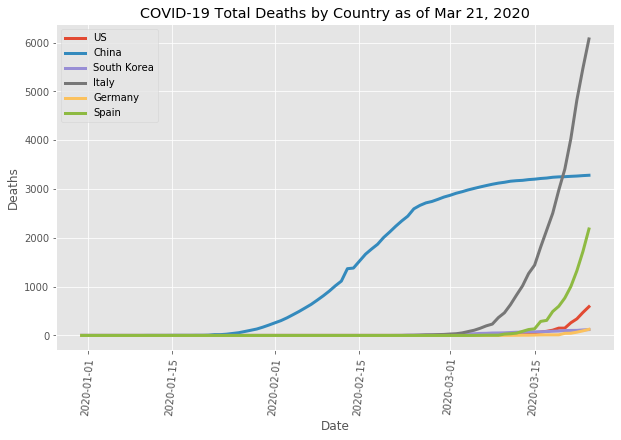

In [76]:
plt.style.use('ggplot')
dfloc = df.groupby('location')
plt.figure(figsize=(10,6))
plt.plot(dfloc.get_group('United States')['total_deaths'], label='US', linewidth=3)
plt.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=3)
plt.plot(dfloc.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Deaths by Country as of Mar 23, 2020')
plt.ylabel('Deaths')
plt.xlabel('Date')
#plt.show()
#plt.savefig('COVID-2020-03-21d.png', bbox_inches='tight', pad_inches=0.2)

Text(0.5, 0, 'Date')

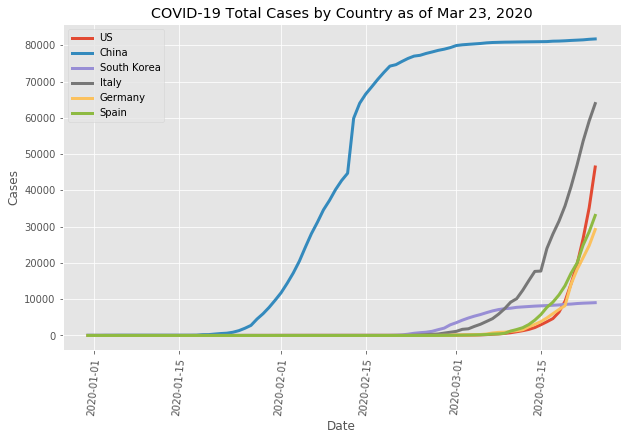

In [77]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(dfloc.get_group('United States')['total_cases'], label='US', linewidth=3)
plt.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
plt.plot(dfloc.get_group('South Korea')['total_cases'], label='South Korea', linewidth=3)
plt.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
plt.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
plt.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
plt.xticks(rotation='85')
plt.legend(loc='best')
plt.title('COVID-19 Total Cases by Country as of Mar 23, 2020')
plt.ylabel('Cases')
plt.xlabel('Date')

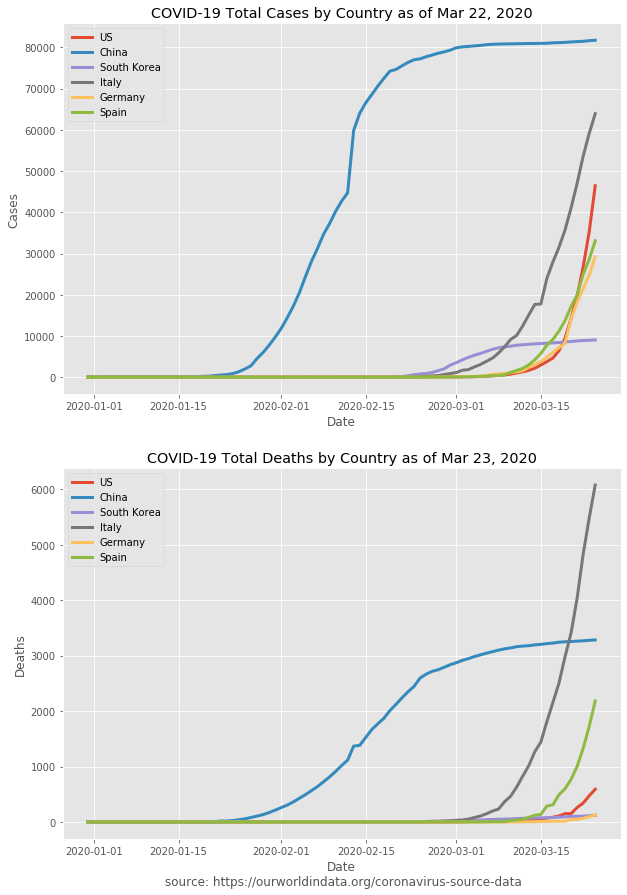

In [78]:
# Double figure for World Cases and World Deaths
plt.style.use('ggplot')
fig3, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United States')['total_cases'], label='US', linewidth=3)
ax1.plot(dfloc.get_group('China')['total_cases'], label='China', linewidth=3)
ax1.plot(dfloc.get_group('South Korea')['total_cases'], label='South Korea', linewidth=3)
ax1.plot(dfloc.get_group('Italy')['total_cases'], label='Italy', linewidth=3)
ax1.plot(dfloc.get_group('Germany')['total_cases'], label='Germany', linewidth=3)
ax1.plot(dfloc.get_group('Spain')['total_cases'], label='Spain', linewidth=3)
#ax1.xticks(rotation='85')
ax1.legend(loc='best')
ax1.set_title('COVID-19 Total Cases by Country as of Mar 22, 2020')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United States')['total_deaths'], label='US', linewidth=3)
ax2.plot(dfloc.get_group('China')['total_deaths'], label='China', linewidth=3)
ax2.plot(dfloc.get_group('South Korea')['total_deaths'], label='South Korea', linewidth=3)
ax2.plot(dfloc.get_group('Italy')['total_deaths'], label='Italy', linewidth=3)
ax2.plot(dfloc.get_group('Germany')['total_deaths'], label='Germany', linewidth=3)
ax2.plot(dfloc.get_group('Spain')['total_deaths'], label='Spain', linewidth=3)
#ax2.xticks(rotation='85')
ax2.legend(loc='best')
ax2.set_title('COVID-19 Total Deaths by Country as of Mar 23, 2020')
ax2.set_ylabel('Deaths')
ax2.set_xlabel('Date\n source: https://ourworldindata.org/coronavirus-source-data')
#ax2.text(1, 1, 'source: https://ourworldindata.org/coronavirus-source-data')
#plt.figtext(5, 0.5, 10, text='test')
#plt.show()
plt.savefig('COVID-2020-03-24_US.png', bbox_inches='tight', pad_inches=0.2)

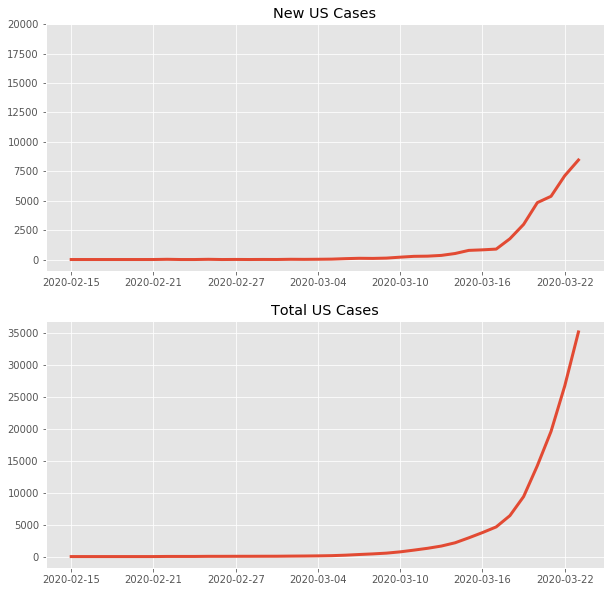

In [46]:
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

#plot 'new_cases' from United States from Feb 15 - Current Date 
ax1 = plt.subplot(211)
ax1.plot(dfloc.get_group('United States')["2020-02-15":].new_cases, linewidth=3)
ax1.set_ylim((-1000,20000))
ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
ax1.set_title('New US Cases')

ax2 = plt.subplot(212)
ax2.plot(dfloc.get_group('United States')["2020-02-15":].total_cases, linewidth=3)
ax2.xaxis.set_major_locator(plt.MaxNLocator(7))
ax2.set_title('Total US Cases')

plt.show()

In [197]:
# return multiple columsn for row with the maximum number of new deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['new_deaths'] == df_us['new_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-21,United States,5374,19624,110,260


In [198]:
# return location and new cases for row with the maximum number of total deaths
df_us[['location','new_cases','total_cases','new_deaths','total_deaths']][df_us['total_deaths'] == df_us['total_deaths'].max()]

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-03-22,United States,7123,26747,80,340


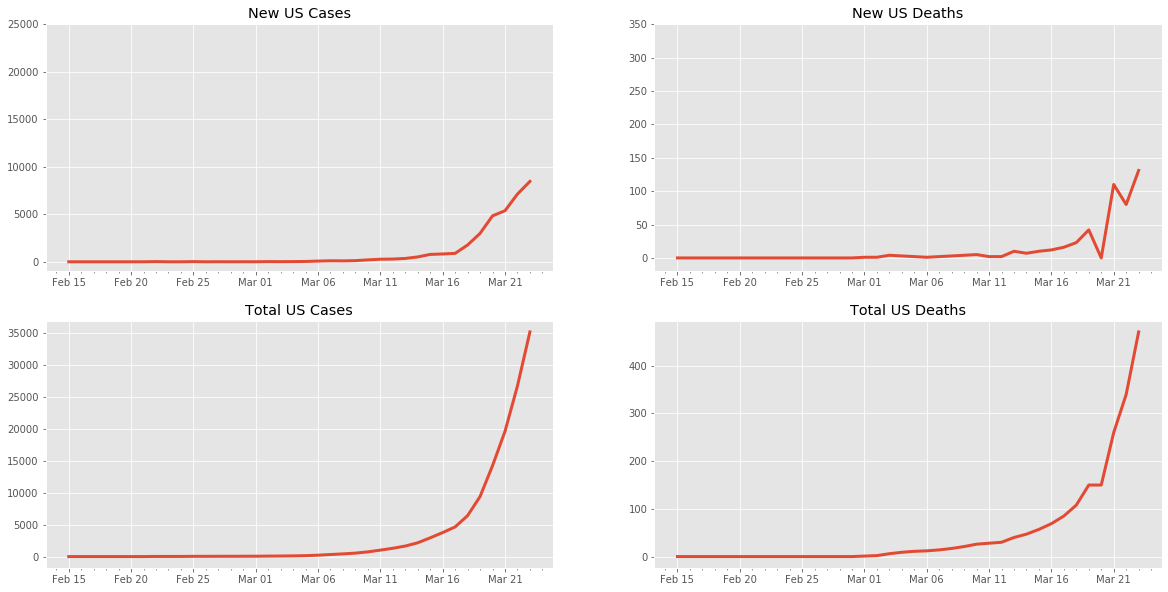

In [47]:
plt.style.use('ggplot')
#plt.xkcd()

#create a figure with two rows and two columns of graphs
fig, (axes) = plt.subplots(2, 2, figsize=(20,10))

#new graph in position 1 of 4 in 2x2 figure
ax1 = plt.subplot(221)
#plot 'new_cases' from location grouped dataframe
ax1.plot(dfloc.get_group('United States')["2020-02-15":].new_cases, linewidth=3)
#set y-limit to match scale of total cases
ax1.set_ylim((-1000,25000))
#set ticks every week
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set major ticks at seven spots
#ax1.xaxis.set_major_locator(plt.MaxNLocator(7))
# set minor ticks at days
ax1.xaxis.set_minor_locator(mdates.DayLocator())
ax1.set_title('New US Cases')

ax2 = plt.subplot(223)
ax2.plot(dfloc.get_group('United States')["2020-02-15":].total_cases, linewidth=3)
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_minor_locator(mdates.DayLocator())
ax2.set_title('Total US Cases')

ax3 = plt.subplot(222)
#ax3.plot(df_mar_us.new_deaths.resample('D').mean())
ax3.plot(dfloc.get_group('United States')["2020-02-15":].new_deaths, linewidth=3)
ax3.set_ylim((-20,350))
#major ticks once a week
#ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
#major ticks every 4 days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax3.xaxis.set_minor_locator(mdates.DayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_title('New US Deaths')

ax4 = plt.subplot(224)
ax4.plot(dfloc.get_group('United States')["2020-02-15":].total_deaths, linewidth=3)
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(SU, WE)))
#ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax4.xaxis.set_minor_locator(mdates.DayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_title('Total US Deaths')

plt.show()

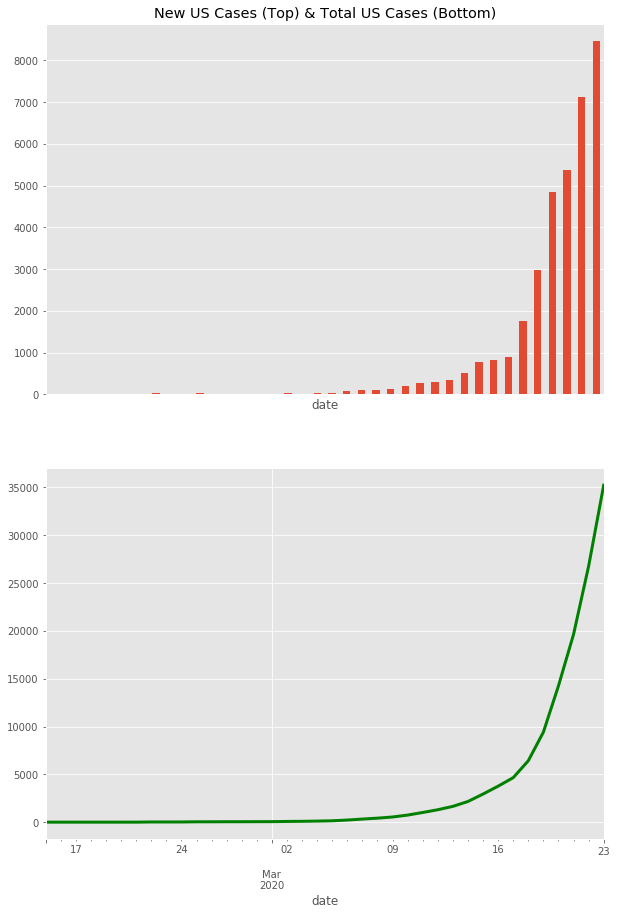

In [48]:
#fig, (axes) = plt.subplots(nrows=2, ncols=1, figsize=(16,20), sharex=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

#x_indexes = np.arange(len(dfloc.get_group('United States')["2020-02-15":].total_cases))
#print(x_indexes)

#ax1=dfloc.get_group('United States')["2020-02-15":].new_cases.plot(ax=axes[0], color='orange', kind='bar')
dfloc.get_group('United States')["2020-02-15":].new_cases.plot(kind='bar', ax=ax1)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax1=ax1.set_ylim((-1000,20000))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1=ax1.xaxis.set_minor_locator(mdates.DayLocator())
#ax2=dfloc.get_group('United States')["2020-02-15":].total_cases.plot(ax=axes[1], color='green', kind='line')
dfloc.get_group('United States')["2020-02-15":].total_cases.plot(ax=ax2, color='green', linewidth=3)
#ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
#ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#set y-limit to match scale of total cases
#ax1.set_ylim((-1000,20000))

ax1.set_title('New US Cases (Top) & Total US Cases (Bottom)')
#ax2.set_title('Total US Cases')
plt.show()